/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


sea_ice_area_fraction / (%)         (time: 1032; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 ScenarioMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60225.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-03-18T13:44:33Z
        data_specs_version          01.00.27
        experiment         

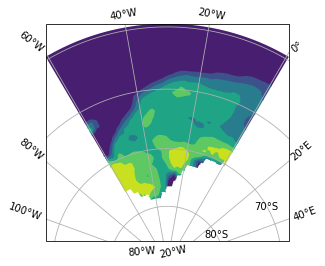

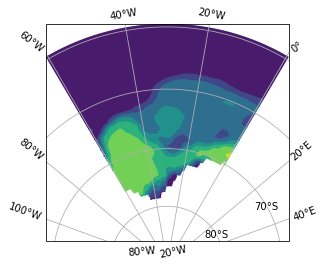

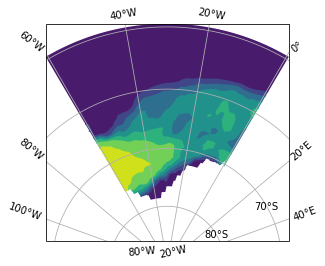

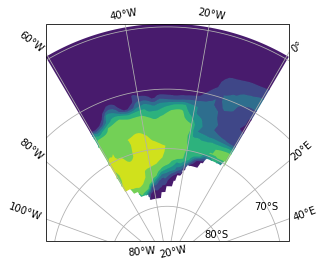

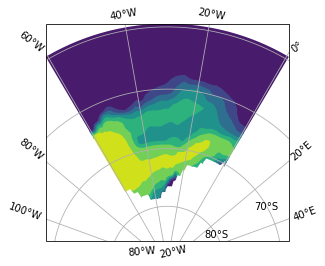

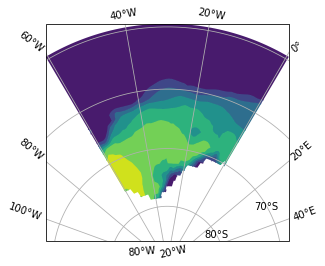

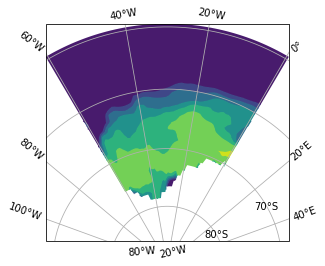

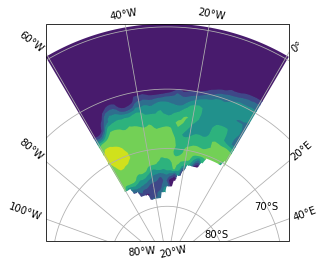

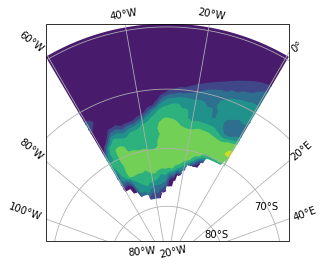

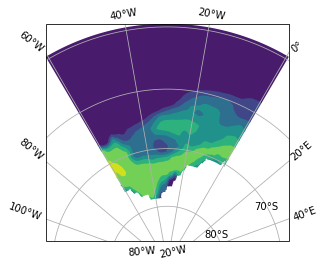

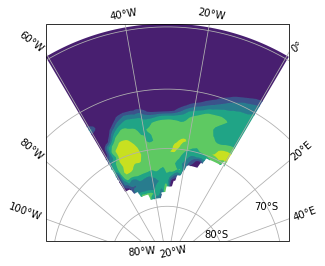

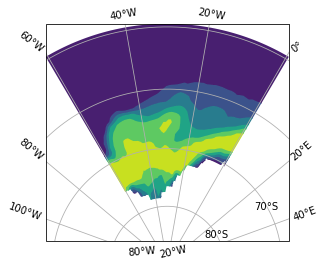

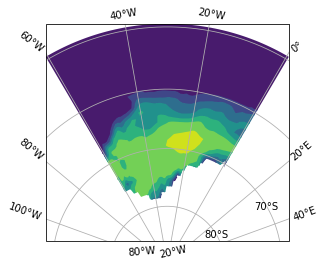

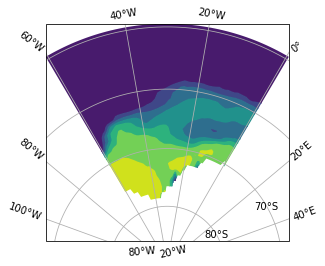

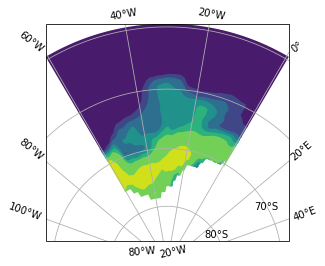

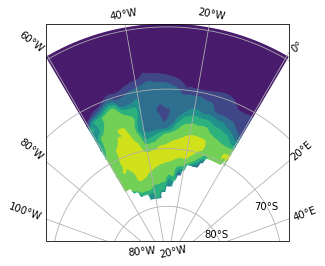

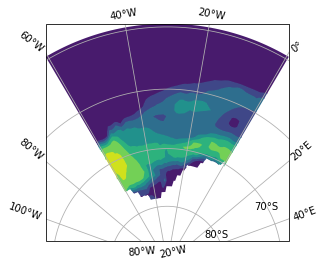

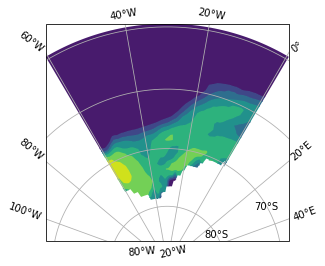

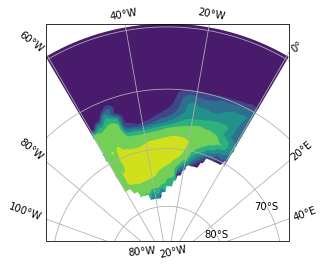

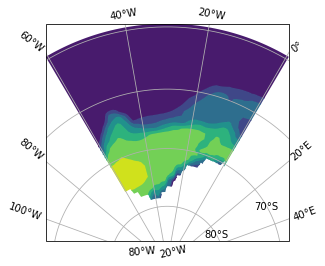

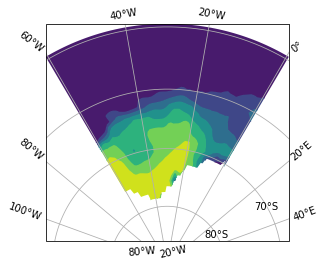

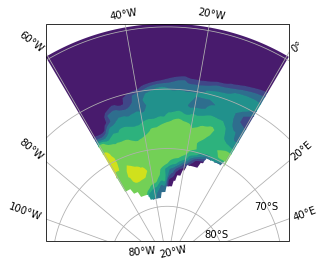

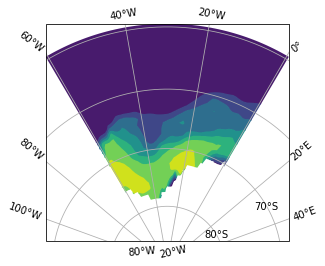

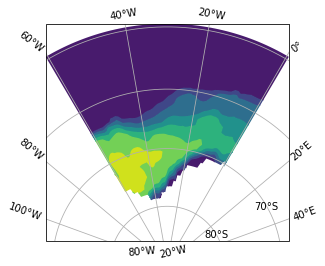

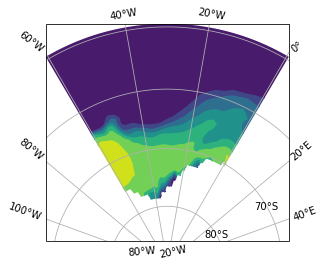

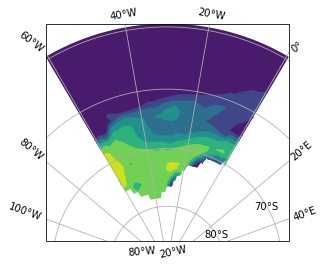

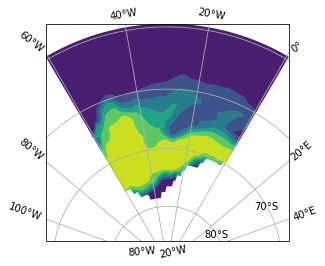

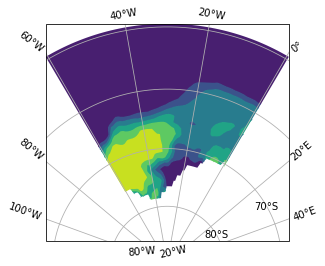

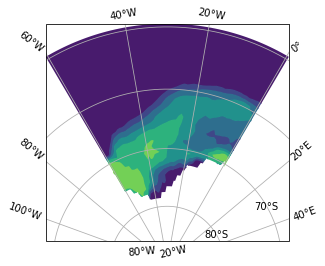

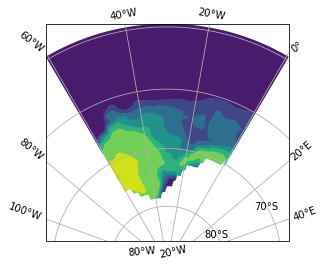

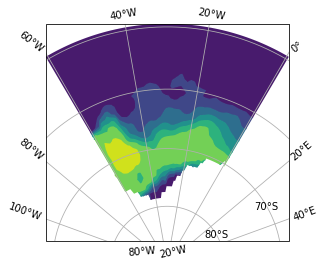

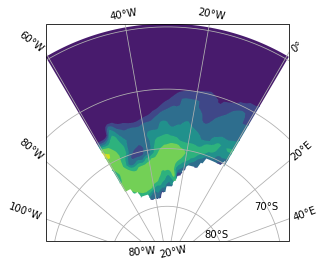

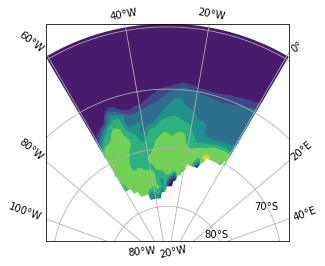

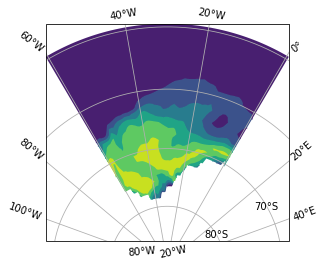

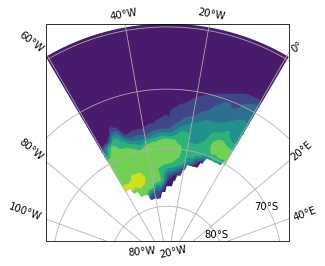

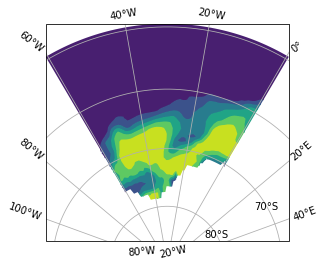

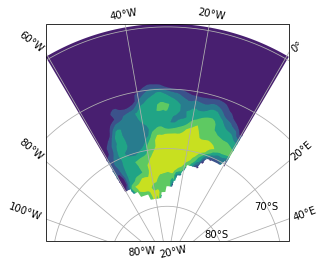

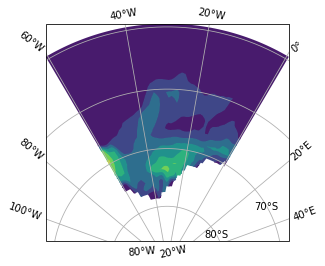

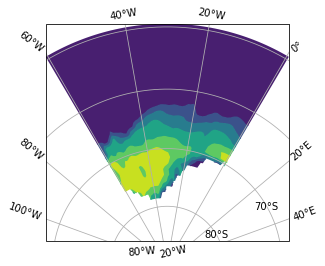

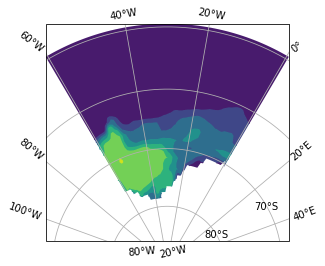

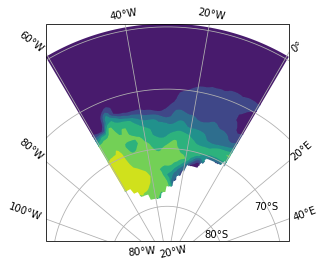

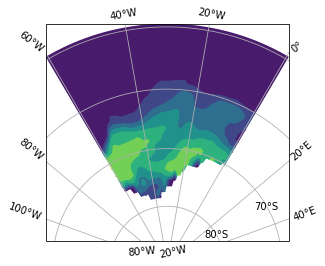

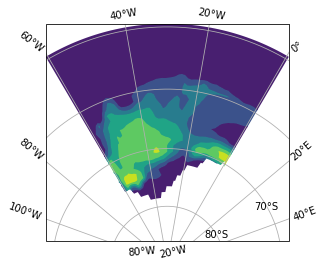

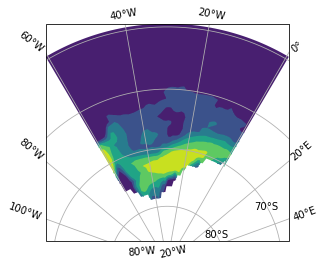

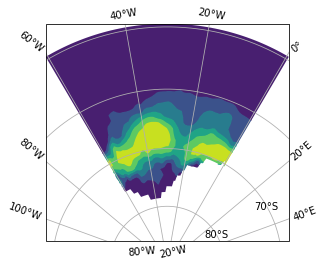

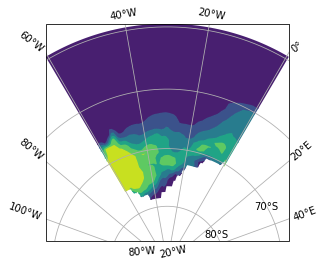

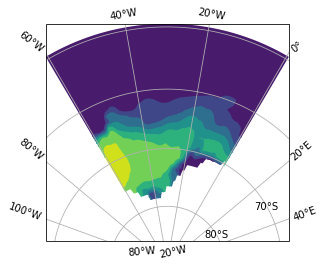

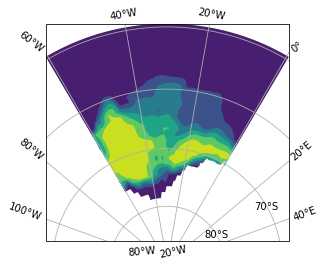

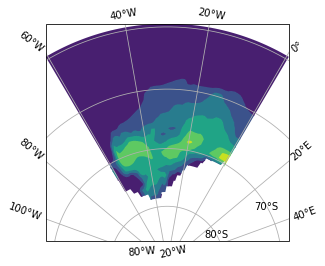

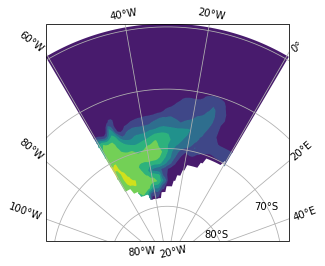

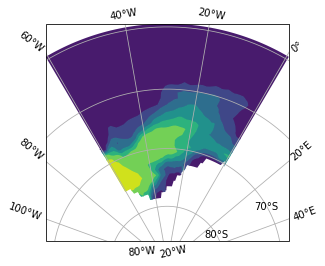

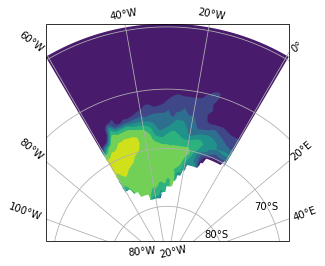

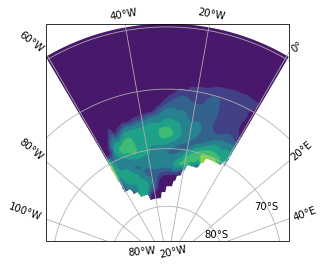

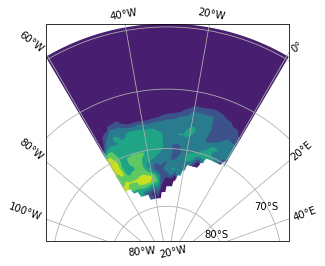

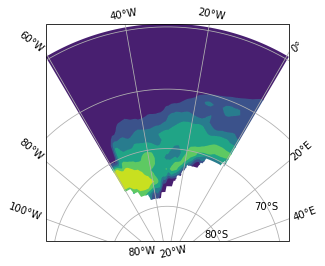

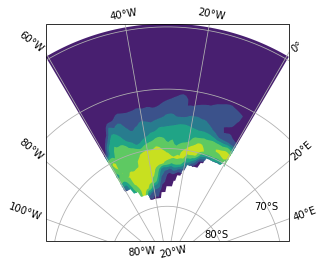

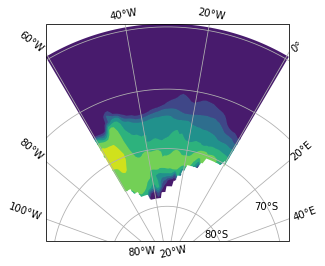

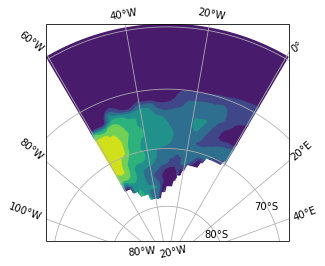

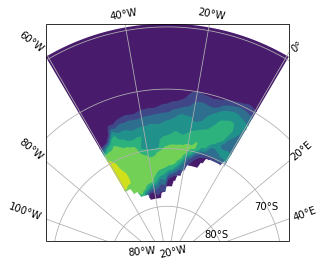

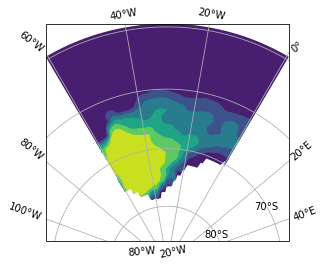

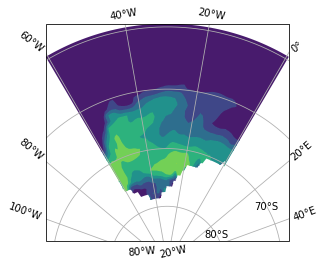

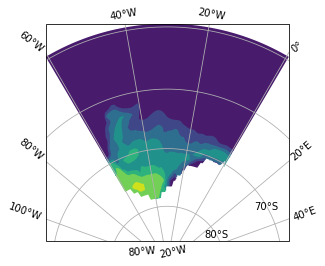

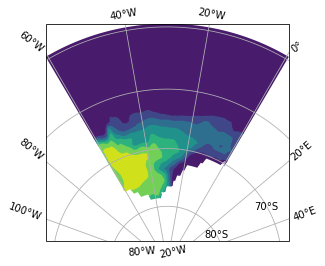

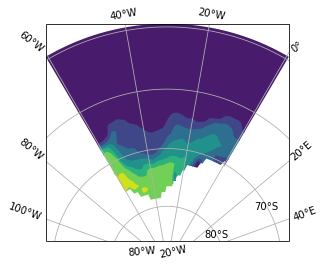

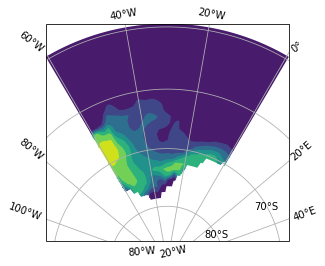

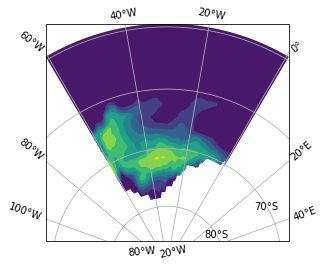

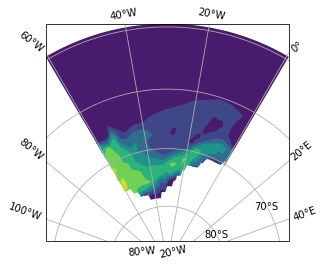

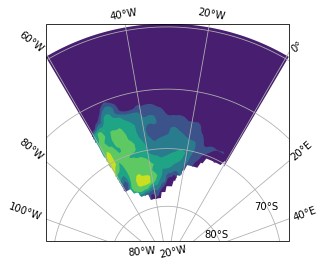

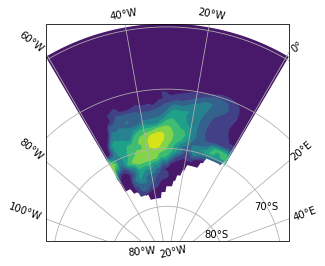

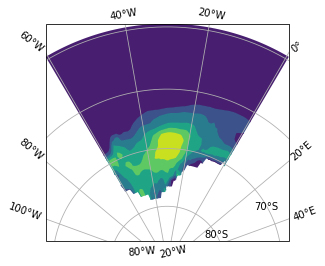

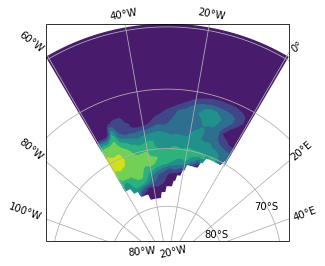

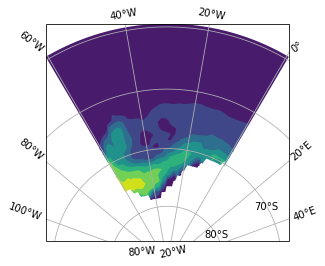

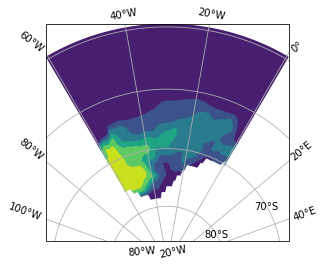

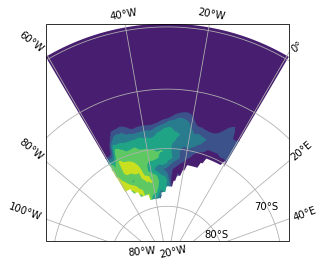

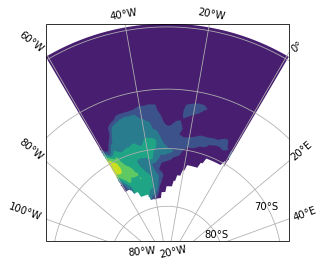

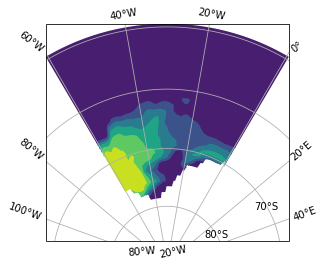

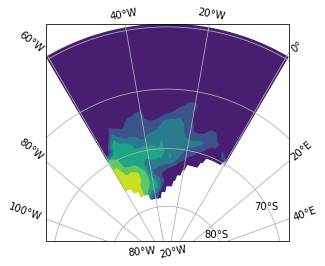

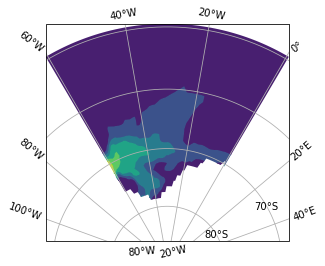

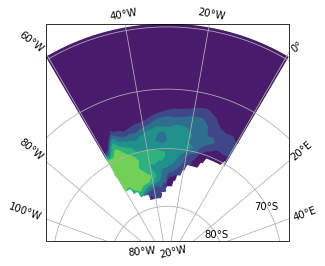

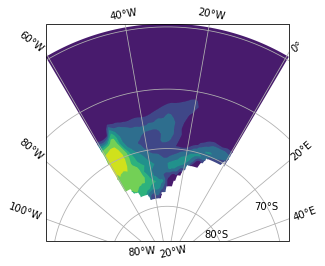

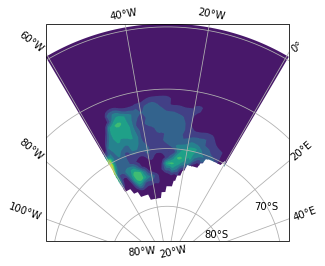

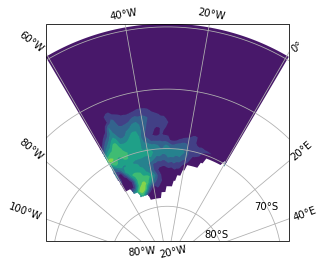

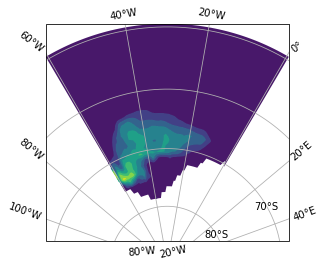

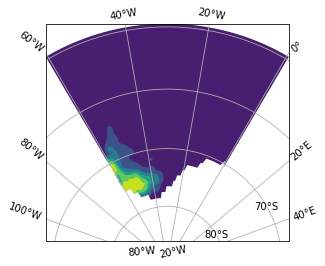

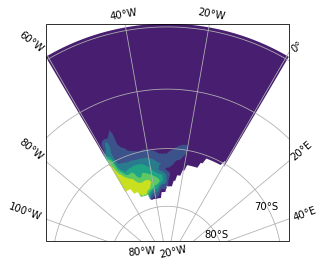

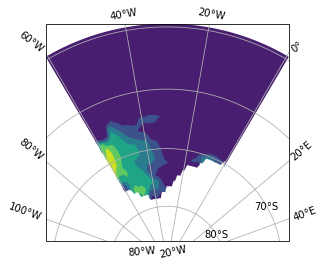

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import *
from iris.analysis.cartography import *
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

fname = '/Users/alicebrindley/OneDrive - University of Exeter/siconc_SImon_GFDL-CM4_ssp585_r1i1p1f1_gr_201501-210012.nc'
cube = iris.load(fname)
siconc=cube[2]
print(siconc)

#extract Jan and Dec to average the sea ice concentration across these months
add_month_number(siconc, 'time', name='month_number')
cube2 = siconc[np.where((siconc.coord('month_number').points == 12))]
#then to average this by each year, so that you have the December-Jan for each year add the 'season year', i.e. a number of each 'season'
add_season_year(cube2, 'time', name='season_year')
#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#has this averaged every year in the cube?

for i in range (0,2101-2015):
    cube3=cube2[i,:,:]
    west=-60
    east=0
    south=-85
    north=-50
    temporary_cube = cube3.intersection(longitude = (west, east)) 
    regional_cube = temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.SouthPolarStereo(central_longitude=np.round(west + (east - west)/2.0))) 
    my_plot = iplt.contourf(regional_cube)
    plt.gca().gridlines(draw_labels=True)
    plt.show()

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


65.29097560194673


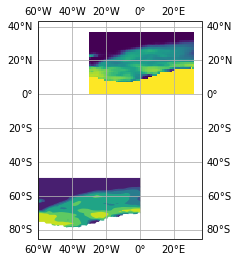

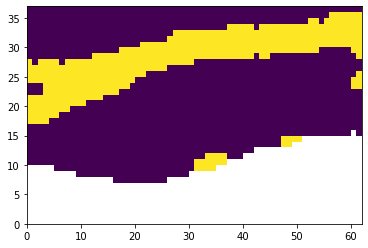

72.31285220286885


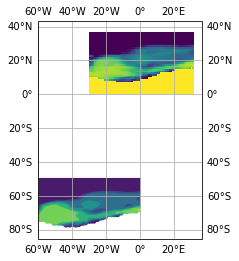

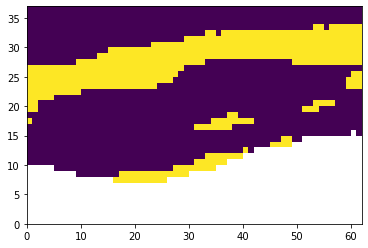

68.61117603739754


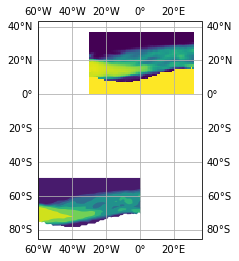

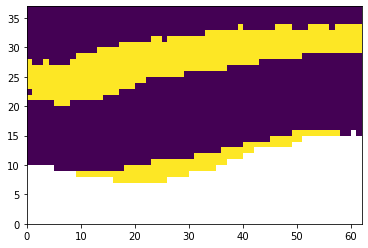

79.58209528688525


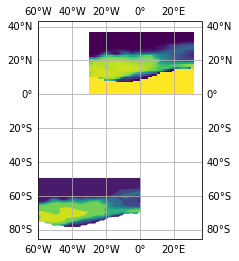

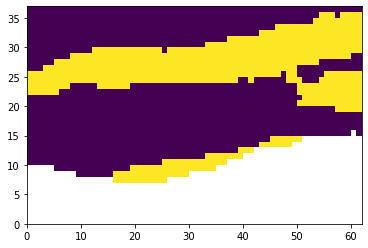

83.40945184426229


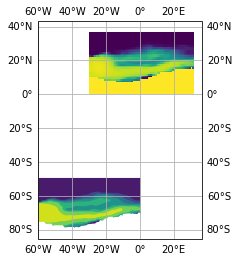

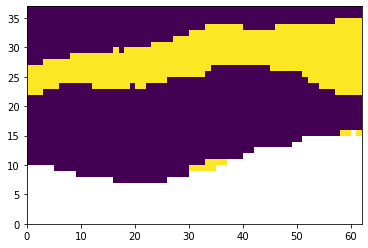

72.22379290471312


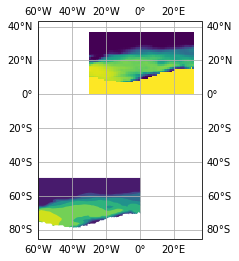

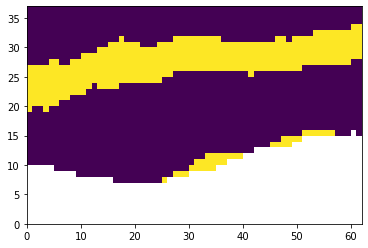

79.78462794569673


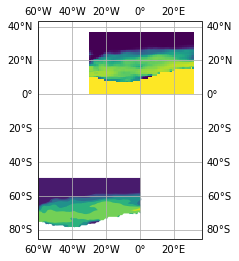

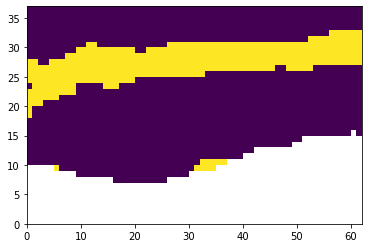

82.16749647797131


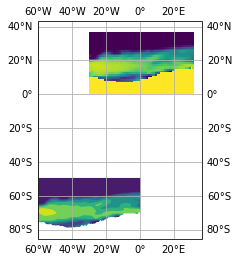

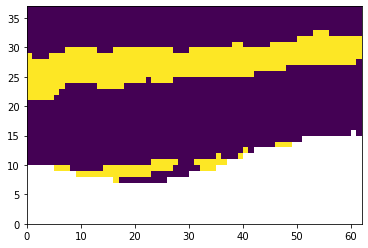

75.71185002561475


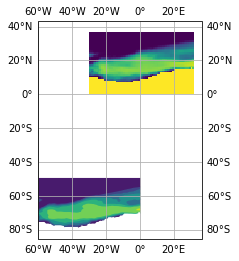

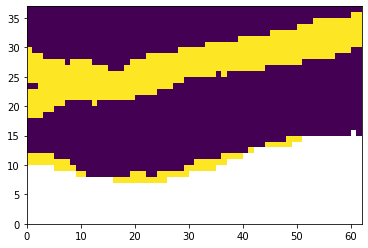

59.11195648693648


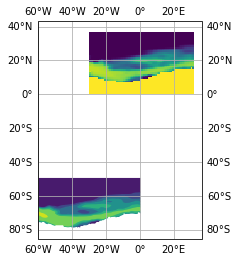

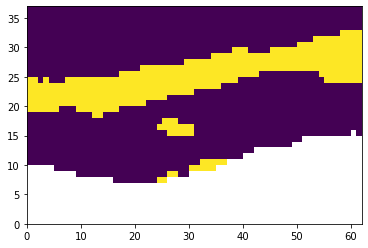

66.46447553790983


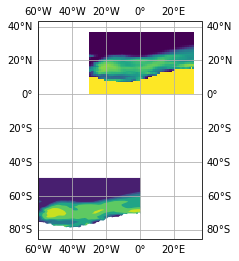

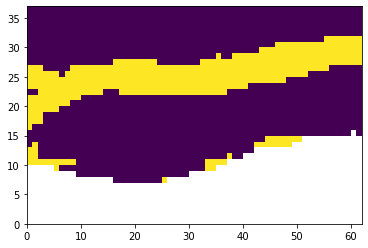

66.26603723744877


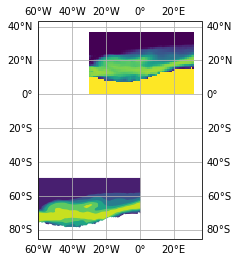

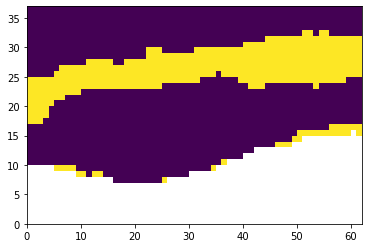

73.1465564164959


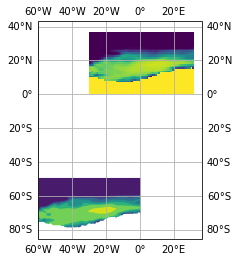

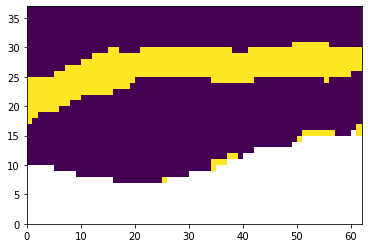

87.0552478227459


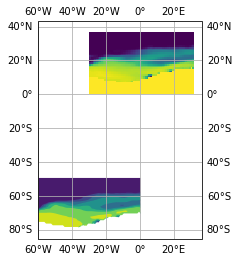

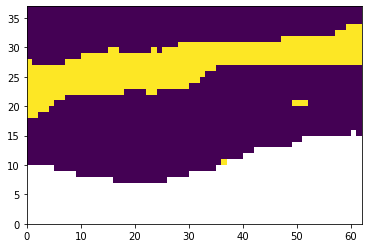

78.1241515112705


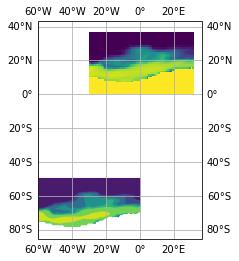

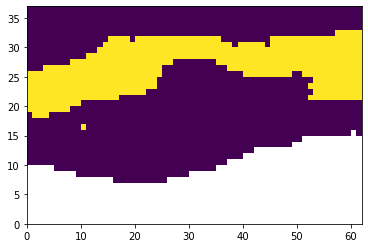

88.47197585809427


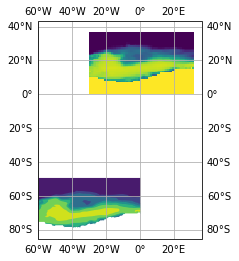

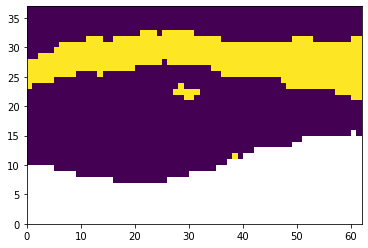

66.61862032530738


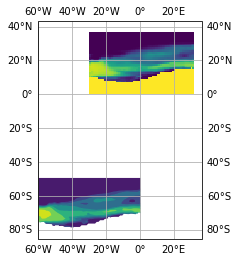

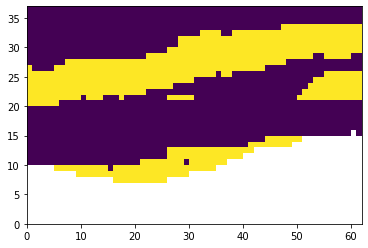

71.03622886782787


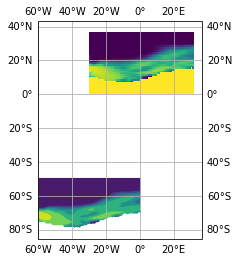

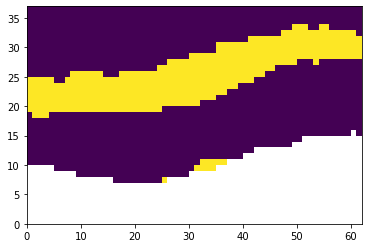

73.40396868596312


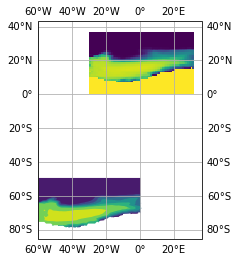

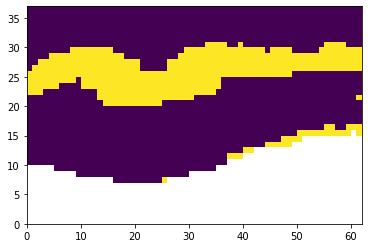

78.46131371670081


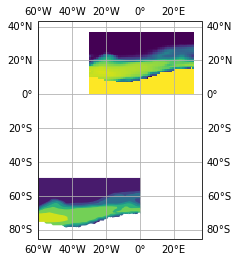

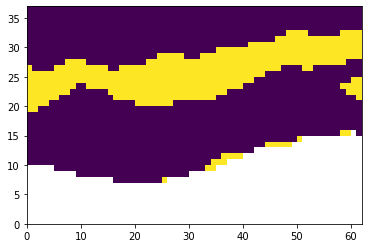

68.59099641393442


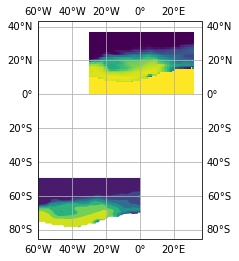

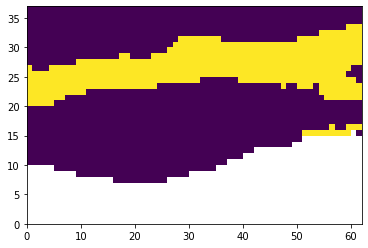

73.79357710040983


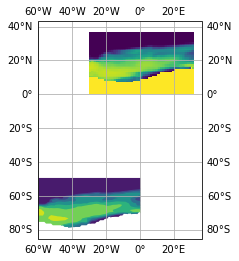

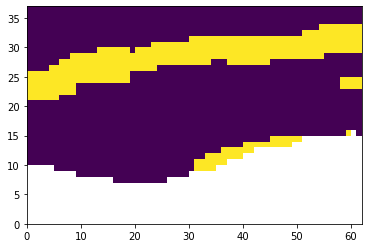

68.84498271004098


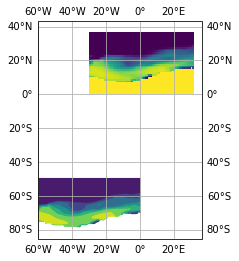

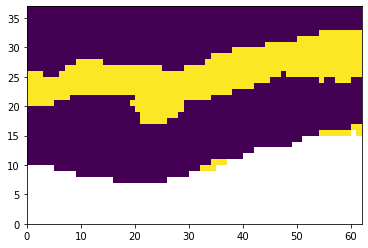

68.50955750512296


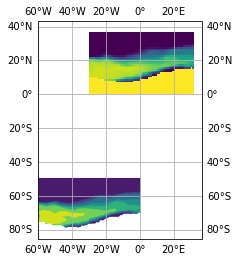

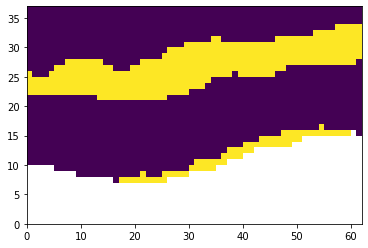

83.79505795338115


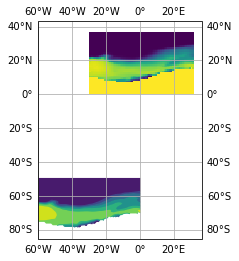

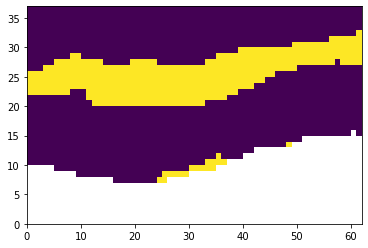

71.70394947489754


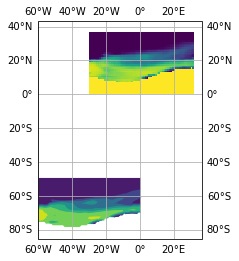

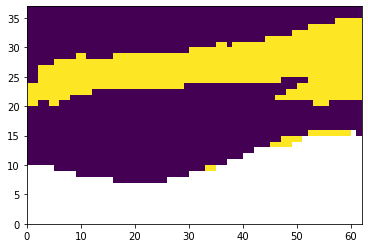

79.94801005379098


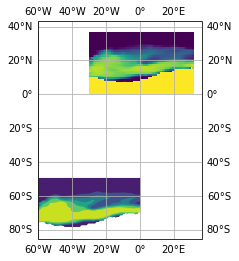

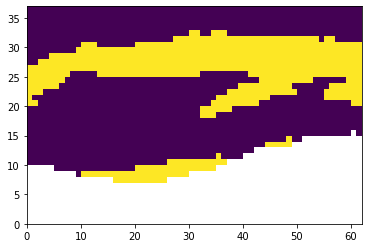

61.51942719006148


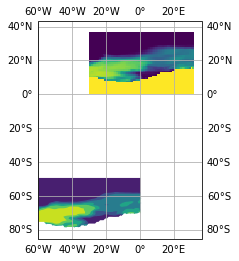

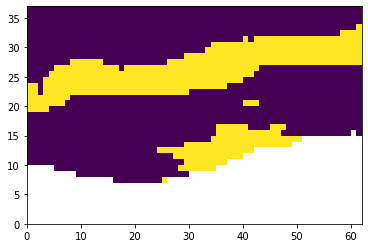

66.65482517930327


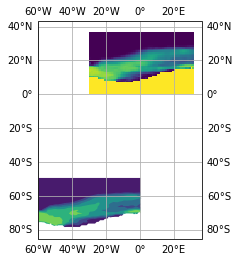

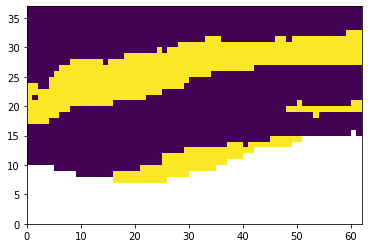

78.09910508452869


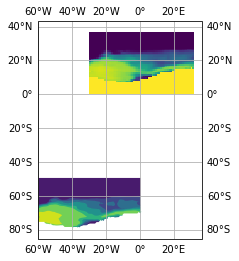

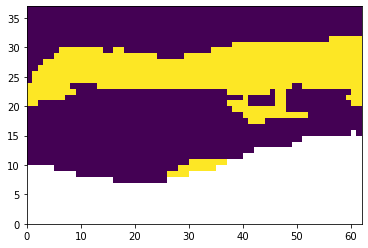

85.34280545594262


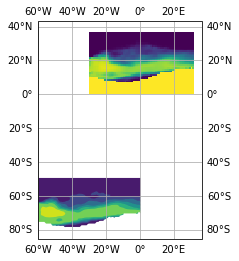

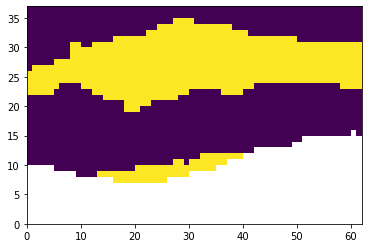

58.92910716572746


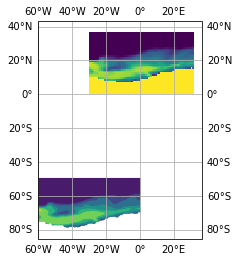

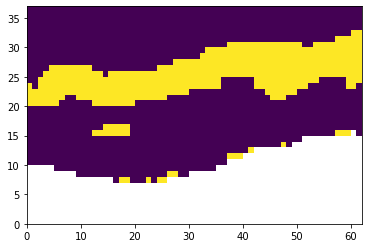

81.25977362961065


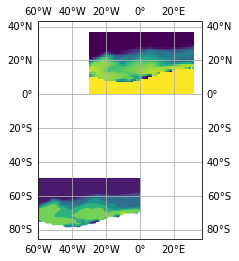

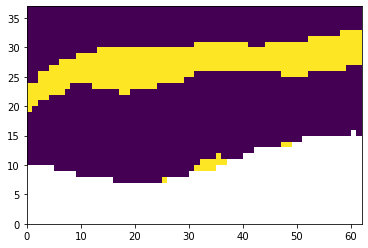

67.22232005635246


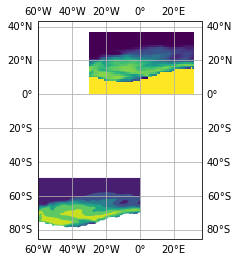

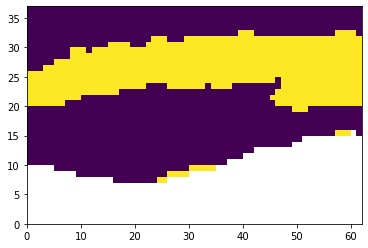

75.79216028432377


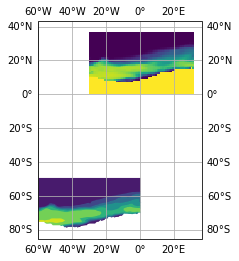

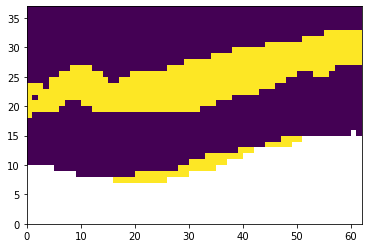

66.52162445568648


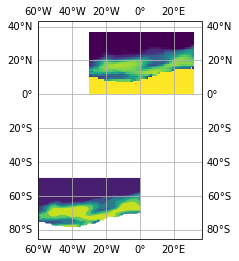

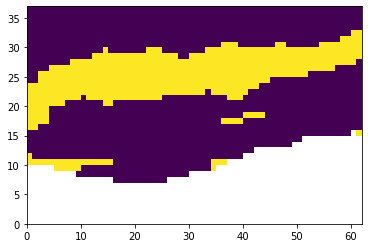

56.36137615266394


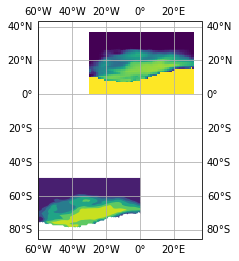

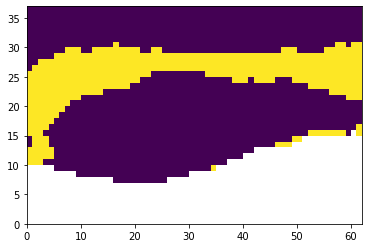

44.53152215676229
63.46944239882172


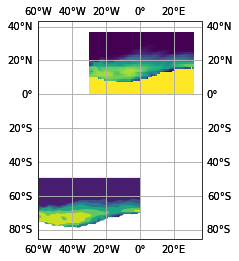

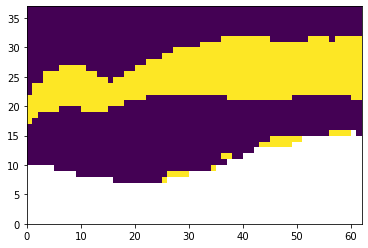

57.86702340548156


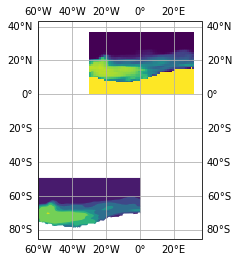

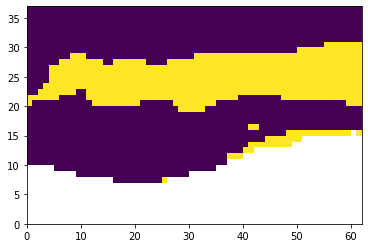

71.81204373719262


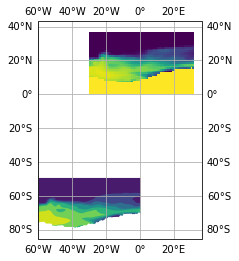

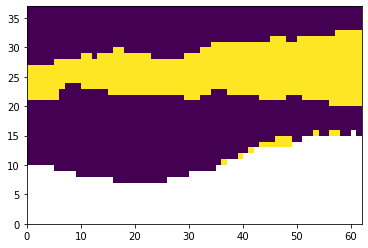

72.51133452868852


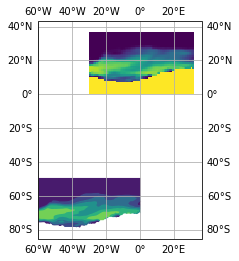

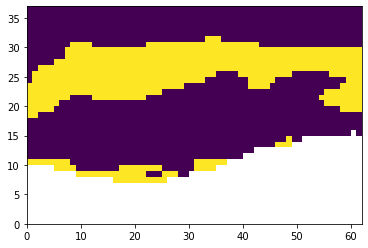

53.859767225922134
60.492927926485656


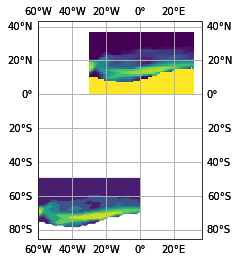

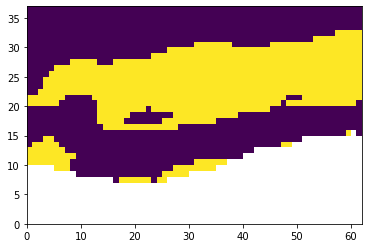

69.55541591956967


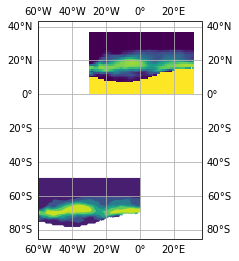

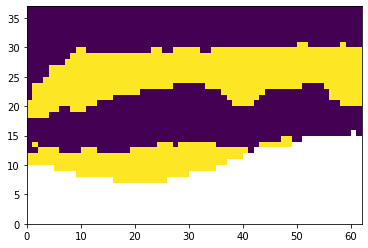

59.01456038678279


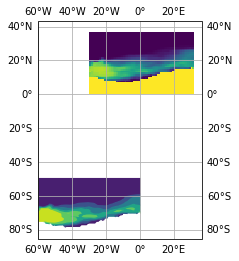

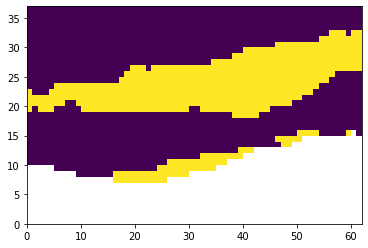

65.12844598488729


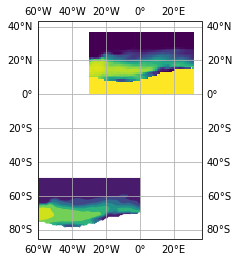

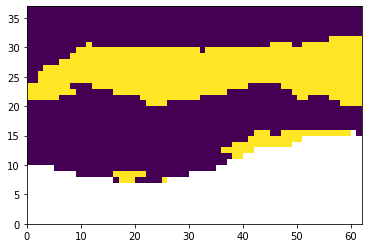

71.44262295081967


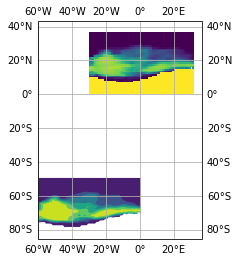

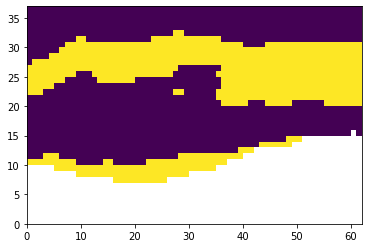

51.34788438140369
49.90894755379098
62.51055407914959


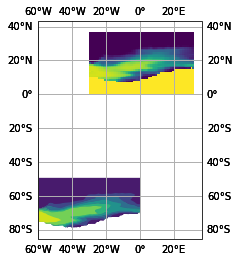

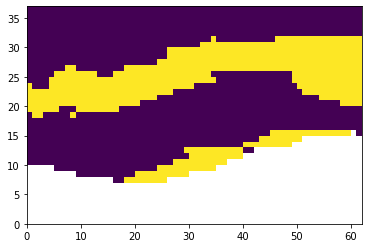

68.18621926229508


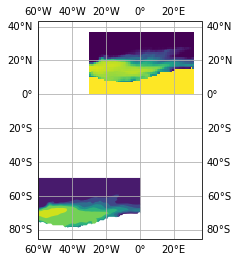

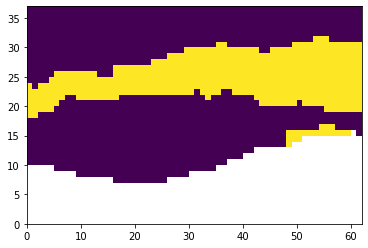

44.807481109118854
50.94185851050205
48.007576363985656
67.69197457735656


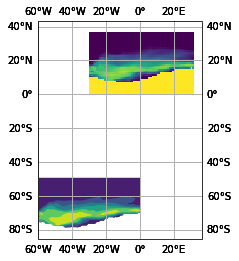

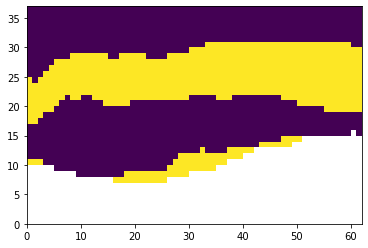

79.01022989241804


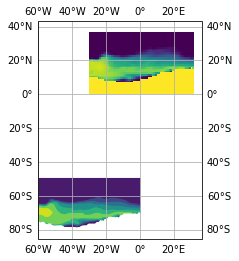

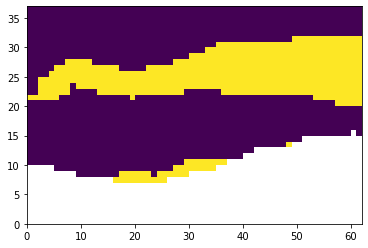

50.13440541752049
63.69695344518443


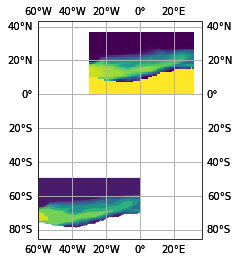

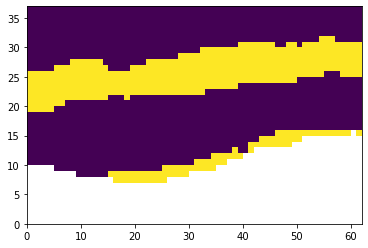

56.992143474641395


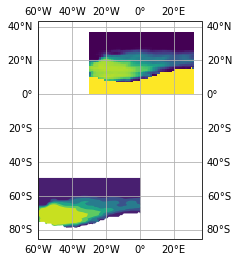

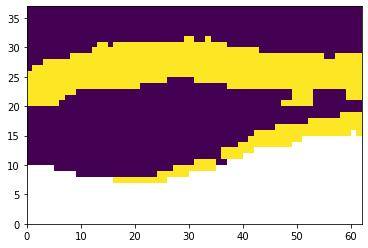

70.25902920081967


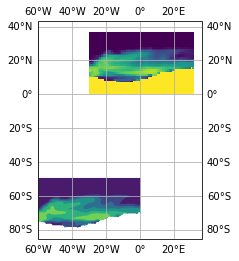

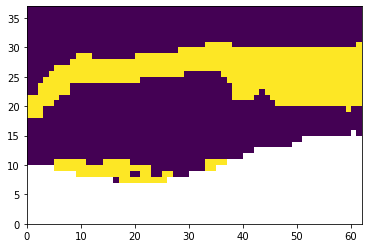

49.49348824923156
58.51045001921106


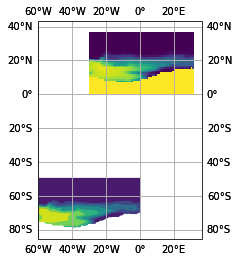

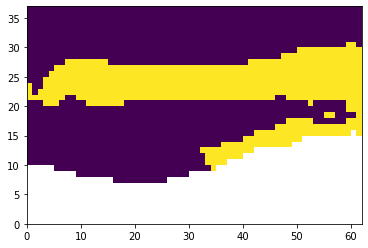

44.48576379994877
54.0477074795082
52.058097464139344
47.22237608862705
40.988277247694676
44.72410508452869
53.482057665215166
71.23006051485656


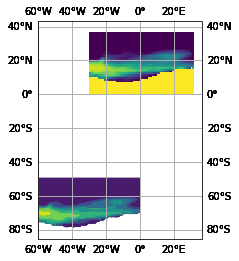

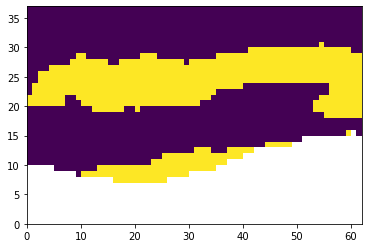

45.394947489754095
45.35802622310451
41.47150358606557
31.917564517161885
50.976658555327866
35.43152455814549
39.01061411372951
49.90048267802254
45.083492091444676
20.28762367123463
30.668891281378073
15.087985679751537
12.362377729572234
17.253492011398567
31.950321385117828


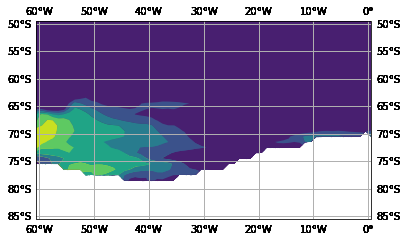

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

fname = '/Users/alicebrindley/OneDrive - University of Exeter/siconc_SImon_GFDL-CM4_ssp585_r1i1p1f1_gr_201501-210012.nc'
cube = iris.load(fname)

siconc=cube[2] 
add_month_number(siconc, 'time', name='month_number2')
cube2 = siconc[np.where((siconc.coord('month_number2').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(cube2, 'time', name='season_year')
#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)


#start of the loop
for i in range (0,2101-2015):
    cube3=cube2[i,:,:]
    west=-60
    east=0
    south=-85
    north=-50
    temporary_cube = cube3.intersection(longitude = (west, east)) 
    regional_cube = temporary_cube.intersection(latitude = (south, north))
    ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) 
    my_plot = iplt.contourf(regional_cube)
    plt.gca().gridlines(draw_labels=True)

#extract the latitude I want to work with
    north_edge = regional_cube.extract(iris.Constraint(latitude=-70))
    #average across this latitude
    nE_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
    print(nE_mean.data)
    #latitude = -70
    #grid_areas = area_weights(regional_cube)
    #average_variable = regional_cube.collapsed(['latitude', 'longitude'],MEAN,weights=grid_areas)
    #print(average_variable.data)
 
    if nE_mean.data >=55:
        #define siconc for polynya
        polynya_threshold=regional_cube.data
        polynya = np.where((polynya_threshold.data <=10) & (nE_mean.data >=55))
        #print(polynya)
        polynya = polynya_threshold.data
        plt.pcolormesh(polynya_threshold.data,vmin=0,vmax=100)
        plt.show()

        #define a variable to hold the threshold number you are interested in
        polynya_threshold_value = 30.0
        #Take a copy of the seaice data that we are going to use to make a binary 'mask' showing presence of absense of polynyas as 1s and 0s
        polynya_location = polynya_threshold.data.copy()
        #set that land data in this mask to nan (Not a number) so we don;t get confused (these will show up white in a typical plot)
        polynya_location[np.where(polynya_location >= 1.0e9)] = np.nan
        #make water that has more ice than our polynia condition equal to zero.
        polynya_location[np.where((polynya_location <= 100.0) & (polynya_location > polynya_threshold_value))] = 0.0
        #make water that has less ice than our polynia condition equal to zero to make where the polynya is
        polynya_location[np.where((polynya_location > 0.0) & (polynya_location <= polynya_threshold_value))] = 1.0
        #plot this data
        plt.pcolormesh(polynya_location,vmin=0,vmax=1)
        plt.show()
        #Note in this 1st situation, we have not tested to make sure the northern edge has >30% seaice and it has not, so it is eroniously identify
        
      
